# **Distribution**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


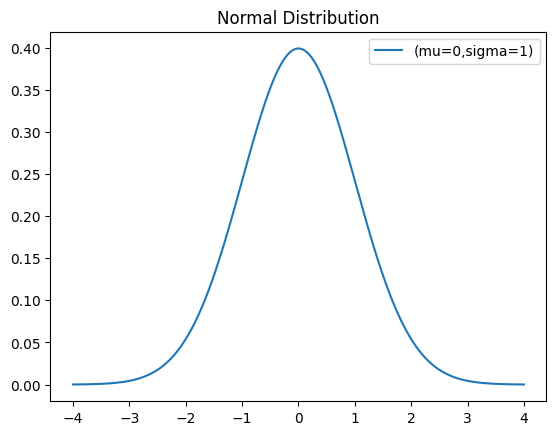

In [ ]:
# normal distribution
from scipy.stats import norm
x=np.linspace(-4,4,1000)
mu,sigma=0,1
plt.plot(x,norm.pdf(x,loc=mu,scale=sigma),label=f'(mu={mu},sigma={sigma})')
plt.title('Normal Distribution')
plt.legend()




Text(0.5, 1.0, 'Beta Distribution')

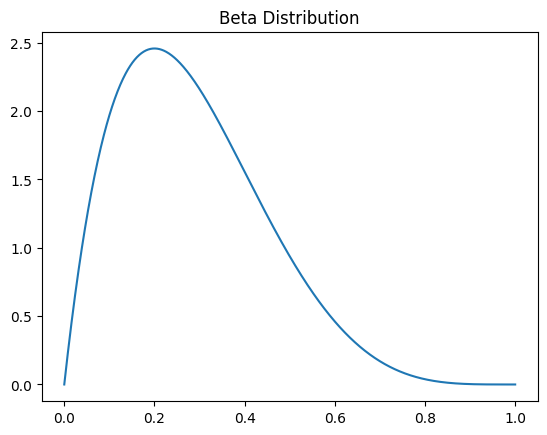

In [ ]:
from scipy.stats import beta
x=np.linspace(0,1,1000)
plt.plot(x,beta.pdf(x,a=2,b=5))
plt.title('Beta Distribution')

Text(0.5, 1.0, 'Gamma Distribution')

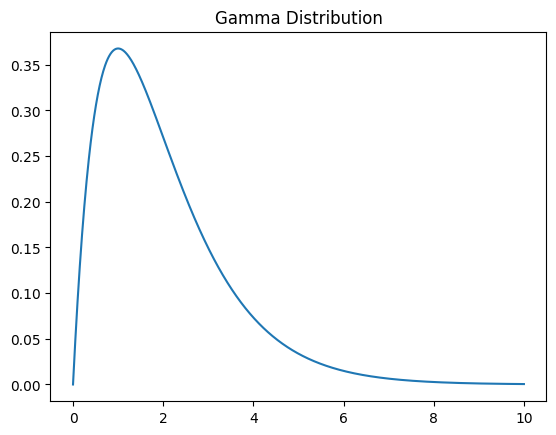

In [ ]:
from scipy.stats import gamma
x=np.linspace(0,10,1000)
plt.plot(x,gamma.pdf(x,a=2))
plt.title('Gamma Distribution')

Text(0.5, 1.0, 'Uniform Distribution')

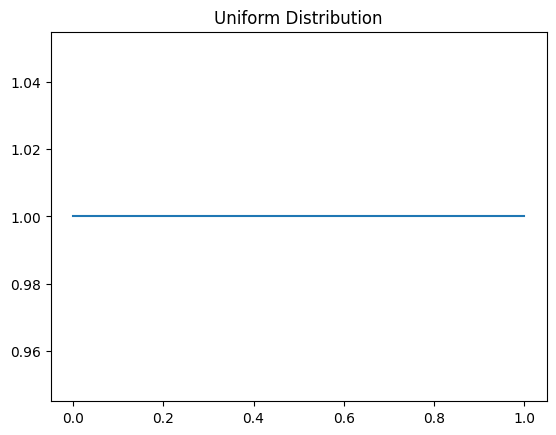

In [ ]:
from scipy.stats import uniform
x=np.linspace(0,1,1000)
plt.plot(x,uniform.pdf(x,loc=0,scale=1))
plt.title('Uniform Distribution')

Text(0.5, 1.0, 'Exponential Distribution')

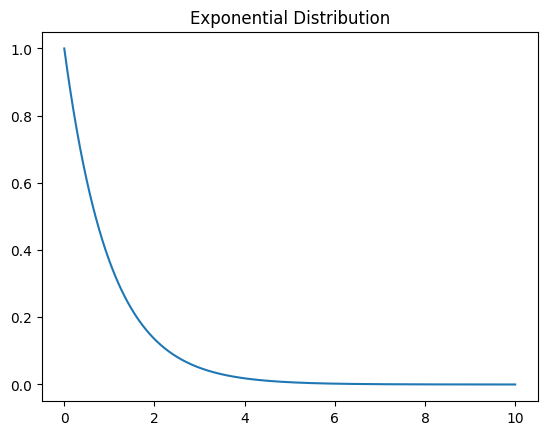

In [ ]:
from scipy.stats import expon
x=np.linspace(0,10,1000)
plt.plot(x,expon.pdf(x,loc=0,scale=1))
plt.title('Exponential Distribution')

Text(0.5, 1.0, 'Cauchy Distribution')

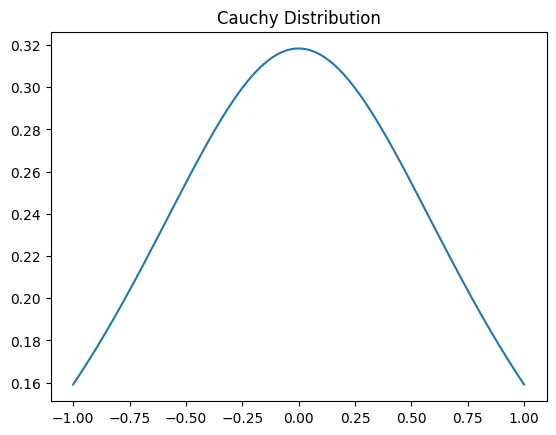

In [ ]:
# cauchy distribution
from scipy.stats import cauchy
x=np.linspace(-1,1,10000)
plt.plot(x,cauchy.pdf(x,loc=0,scale=1))
plt.title('Cauchy Distribution')


Text(0.5, 1.0, 'Chi-Square Distribution')

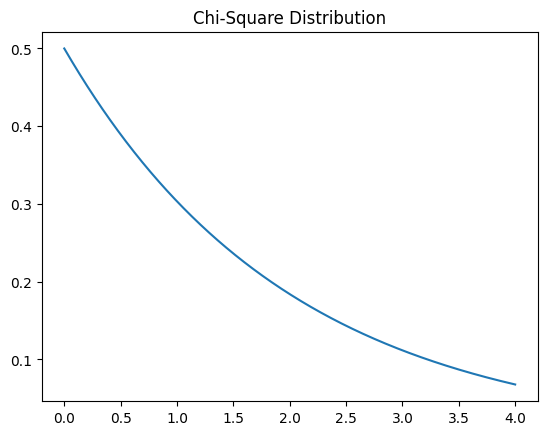

In [ ]:
from scipy.stats import chi2
x=np.linspace(0,4,1000)
plt.plot(x,chi2.pdf(x,df=2))
plt.title('Chi-Square Distribution')

Text(0.5, 1.0, 'Logistic Distribution')

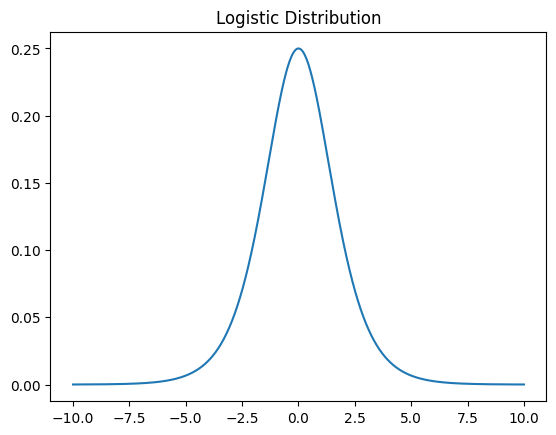

In [ ]:
# logistic
from scipy.stats import logistic
x=np.linspace(-10,10,1000)
plt.plot(x,logistic.pdf(x,loc=0,scale=1))
plt.title('Logistic Distribution')

Text(0.5, 1.0, 'T Distribution')

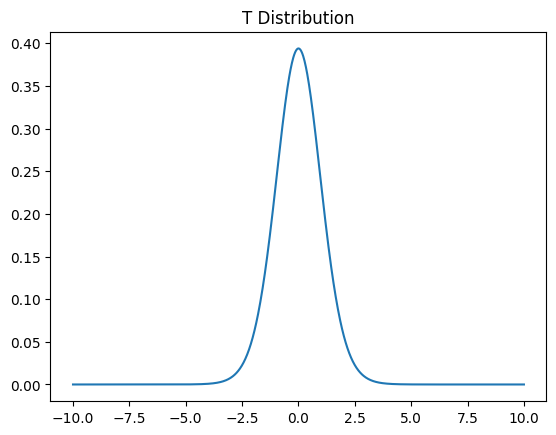

In [ ]:
#t
from scipy.stats import t
x=np.linspace(-10,10,1000)
plt.plot(x,t.pdf(x,df=20))
plt.title('T Distribution')


Text(0.5, 1.0, 'F Distribution')

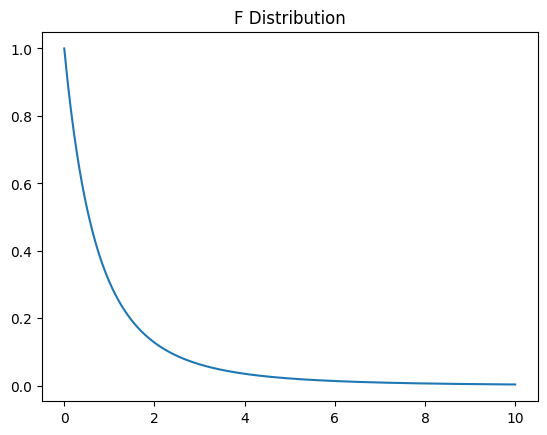

In [ ]:
# f distribution
from scipy.stats import f
x=np.linspace(0,10,1000)
plt.plot(x,f.pdf(x,dfn=2,dfd=5))
plt.title('F Distribution')

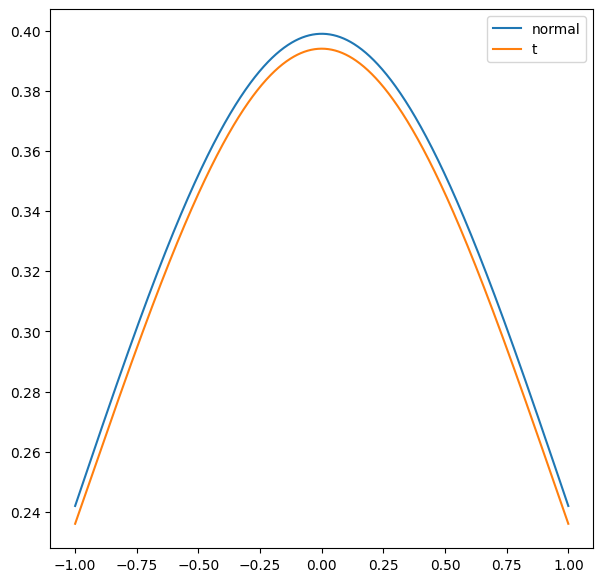

In [ ]:
x=np.linspace(-1,1,1000)
plt.figure(figsize=(7,7))
plt.plot(x,norm.pdf(x,loc=0,scale=1),label='normal')
#plt.plot(x,cauchy.pdf(x,loc=0,scale=1),label='cauchy')
#plt.plot(x,beta.pdf(x,a=2,b=5),label='beta')
#plt.plot(x,gamma.pdf(x,a=2),label='gamma')
plt.plot(x,t.pdf(x,df=20),label='t')
#plt.plot(x,chi2.pdf(x,df=2),label='chi2')
#plt.plot(x,logistic.pdf(x,loc=0,scale=1),label='logistic')
#plt.plot(x,f.pdf(x,dfn=2,dfd=5),label='f')
plt.legend()

# **Confidence Interval**

In [ ]:
import numpy as np

# Given failure times
data = np.array([195.2, 201.4, 183.0, 175.1, 205.1, 191.7, 188.6, 173.5, 200.8, 210.0])

n_bootstrap = 1000  # Number of bootstrap samples

# Compute the sample mean
time_to_failure_mean = np.mean(data)

# Compute lambda estimate
lambda_hat = 1 / time_to_failure_mean

# Bootstrap sampling

for j in [10,100,1000]:
  bootstrap_lambdas = []
  for _ in range(j):
      sample = np.random.choice(data, size=len(data), replace=True)
      bootstrap_mean = np.mean(sample)
      bootstrap_lambda = 1 / bootstrap_mean
      bootstrap_lambdas.append(bootstrap_lambda)

  bootstrap_lambdas = np.array(bootstrap_lambdas)

  # Compute bootstrap point estimate
  lambda_bar = np.mean(bootstrap_lambdas)

  # Compute standard error
  standard_error = np.std(bootstrap_lambdas, ddof=1)

  print(f"Bootstrap estimate of lambda for B={j}: {lambda_bar:.10f}")
  print(f"Standard Error for B={j}: {standard_error:.10f}")
  print()


Bootstrap estimate of lambda for B=10: 0.0051423680
Standard Error for B=10: 0.0000854373

Bootstrap estimate of lambda for B=100: 0.0051897652
Standard Error for B=100: 0.0001060179

Bootstrap estimate of lambda for B=1000: 0.0051953766
Standard Error for B=1000: 0.0001005942



In [ ]:
import numpy as np

# Given failure times
data = np.array([78.7778, 13.5260, 6.8291, 47.3746, 16.2033, 27.5387, 28.2515, 38.5826,
                 35.4363, 80.2757, 50.3861, 81.3155, 42.2532, 33.9970, 57.4312])

r = 4  # Number of components
n_bootstrap = 1000  # Number of bootstrap samples

# Compute the sample mean
time_to_failure_mean = np.mean(data)

# Compute lambda estimate
lambda_hat = r / time_to_failure_mean

# Bootstrap sampling
bootstrap_lambdas = []
for _ in range(n_bootstrap):
    sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_mean = np.mean(sample)
    bootstrap_lambda = r / bootstrap_mean
    bootstrap_lambdas.append(bootstrap_lambda)

bootstrap_lambdas = np.array(bootstrap_lambdas)

# Compute 90% confidence interval
lower_bound = np.percentile(bootstrap_lambdas, 5)
upper_bound = np.percentile(bootstrap_lambdas, 95)

print(f"Bootstrap estimate of lambda: {lambda_hat:.4f}")
print(f"90% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")


Bootstrap estimate of lambda: 0.0940
90% Confidence Interval: (0.0763, 0.1220)


In [ ]:
import numpy as np
from scipy import stats
psj_data=np.array([25.9,30.2,33.7,27.6,33.3,34.6,33.1,30.6,30.5,25.4])
fsj_data=np.array([33.4,37.4,48.0,30.5,27.8,27.5,36.9,31.1,27.1,38.0])
n1=len(psj_data)
n2=len(fsj_data)
mean1,mean2=np.mean(psj_data),np.mean(fsj_data)
std1,std2=np.std(psj_data,ddof=1),np.std(fsj_data,ddof=1)

df=(((std1**2/n1)+(std2**2/n2))**2)/((((std1**2/n1)**2)/(n1+1)) + (((std2**2/n2)**2)/(n2+1)))-2#assuming population variance are not same

# t value for 95% CI
alpha=0.05
t=stats.t.isf(alpha/2,df=df)# inverse survival function
mean_diff=mean1-mean2
margin_of_error=t*np.sqrt((std1**2/n1)+(std2**2/n2))
lower_bound=mean_diff-margin_of_error
upper_bound=mean_diff+margin_of_error
print(t)
print(f"95% CI for difference in means :({lower_bound:.2f},{upper_bound:.2f})")

2.1408663400085013
95% CI for difference in means :(-8.21,1.65)


In [ ]:
brand1=np.array([36925,45300,36240,32100,37210,48360,38200,33500])
brand2=np.array([34318,42280,35500,31950,38015,47800,37810,33215])
n1=len(brand1)
n2=len(brand2)
mean1,mean2=np.mean(brand1),np.mean(brand2)
std1,std2=np.std(brand1,ddof=1),np.std(brand2,ddof=1)

#assuming population variance are not same
df=(((std1**2/n1)+(std2**2/n2))**2)/((((std1**2/n1)**2)/(n1+1)) + (((std2**2/n2)**2)/(n2+1)))-2

# t value for 95% CI
alpha=0.05
t=stats.t.isf(alpha/2,df=df)
mean_diff=mean1-mean2
margin_of_error=t*np.sqrt((std1**2/n1)+(std2**2/n2))
lower_bound=mean_diff-margin_of_error
upper_bound=mean_diff+margin_of_error
print(f"95% CI for difference in means :({lower_bound:.2f},{upper_bound:.2f})")

95% CI for difference in means :(-4878.57,6615.32)


# **Hypothesis Testing**

In [ ]:
import numpy as np
from scipy.stats import chi2

data = [5.34, 5.65, 4.76, 5.00, 5.55, 5.54, 5.07, 5.35, 5.44, 5.25, 5.35, 4.61]

n = len(data)
sample_variance = np.var(data, ddof=1)
variance= 0.5  # Null hypothesis variance

# Test statistic
chi_sq_stat = (n - 1) * sample_variance / variance

# Critical values for alpha = 0.05, two-tailed
alpha = 0.05
upper_crit = chi2.isf(alpha / 2, df=n-1)
lower_crit = chi2.isf(1 - alpha / 2, df=n-1)
# Hypothesis test result
reject_null = chi_sq_stat < lower_crit or chi_sq_stat > upper_crit

print(f"Sample variance: {sample_variance:.4f}")
print(f"Chi-square statistic: {chi_sq_stat:.4f}")
print(f"Acceptance region [{lower_crit:.4f},{upper_crit:.4f}]")
print(f"Reject null hypothesis: {reject_null}")

## using p value ############################
# Two-tailed test: we find both tails
p_value = 2 * min(chi2.cdf(chi_sq_stat, df=n-1), 1 - chi2.cdf(chi_sq_stat, df=n-1))

print(f"Chi-square statistic: {chi_sq_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 5: Decision
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Variance is significantly different.")
else:
    print("Fail to reject null: No significant difference in variance.")



Sample variance: 0.1038
Chi-square statistic: 2.2844
Acceptance region [3.8157,21.9200]
Reject null hypothesis: True
Chi-square statistic: 2.2844
P-value: 0.0056
Reject null hypothesis: Variance is significantly different.


In [ ]:
from scipy.stats import norm
machine1=[16.03,16.04,16.05,16.05,16.02,16.02,15.97,15.96,16.01,15.99]
machine2=[16.01,15.96,15.98,16.02,15.99,16.03,16.04,16.02,16.01,16.00]

sigma1=0.015
sigma2=0.018

n1=len(machine1)
n2=len(machine2)

mean1=sum(machine1)/n1
mean2=sum(machine2)/n2

z_score=(mean1-mean2)/np.sqrt((sigma1**2)/n1  + (sigma2**2)/n2)

print("Z-score",z_score)

alpha=0.05
z_critical=norm.isf(alpha/2)
print("Critical value",z_critical)
if z_score>z_critical:

  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")



##########  using p value ############
p_value = 2 * norm.sf(abs(z_score))
print(f"P-value = {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Z-score 1.079701773571769
Critical value 1.9599639845400545
Fail to reject the null hypothesis
P-value = 0.2803
Fail to reject null hypothesis


In [ ]:
import numpy as np
from scipy.stats import f, ncf

machine1 = np.array([16.03, 16.04, 16.05, 16.05, 16.02])
machine2 = np.array([16.01, 15.96, 15.98, 16.02, 15.99])

alpha = 0.01

#  Test for equality of variances using F-test
s1_sq = np.var(machine1, ddof=1)
s2_sq = np.var(machine2, ddof=1)

F_stat = s2_sq / s1_sq
df1 = len(machine2) - 1
df2 = len(machine1) - 1

# Two-tailed test: reject if F is too small or too large
F_critical_high = f.isf(alpha / 2, df1, df2)
F_critical_low = f.isf(1 - alpha / 2, df1, df2)

print("F-test for equality of variances:")
print(f"F statistic: {F_stat:.4f}")
print(f"Critical values: [{F_critical_low:.4f}, {F_critical_high:.4f}]")

reject_null=F_stat < F_critical_low or F_stat > F_critical_high
print(f"Reject null hypothesis: {reject_null}")

######## using p-value #############
p_value=f.sf(F_stat,df1,df2)
print(f"P-value = {p_value:.4f}")

if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

F-test for equality of variances:
F statistic: 3.3529
Critical values: [0.0432, 23.1545]
Reject null hypothesis: False
P-value = 0.1341
Fail to reject null hypothesis


# **ANOVA**

In [ ]:
import scipy.stats as stats
f_statistic=5.0
df1=2
df2=27

p_value=stats.f.sf(f_statistic,df1,df2)
print("P-value",p_value)
if p_value<0.05:
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

P-value 0.014213058423888479
Reject Null Hypothesis


In [ ]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

# Data
circuit_1 = [19, 22, 20, 18, 25]
circuit_2 = [20, 21, 33, 27, 40]
circuit_3 = [16, 15, 18, 26, 17]

# Create DataFrame
data = pd.DataFrame({
    'ResponseTime': circuit_1 + circuit_2 + circuit_3,
    'CircuitType': ['1']*5 + ['2']*5 + ['3']*5
})

# (a) Test the hypothesis that the three circuit types have the same response time
model = ols('ResponseTime ~ C(CircuitType)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Tukey's HSD(Honestly Significant Difference) Test
tukey = pairwise_tukeyhsd(endog=data['ResponseTime'], groups=data['CircuitType'], alpha=0.05)
print("\n Tukey HSD Results:")
pd.DataFrame(tukey.summary())
print(tukey)

# (c) Orthogonal contrasts
# Assume we want to compare circuit 2 to the average of circuit 1 and circuit 3
contrast_matrix = np.array([
    [-0.5, 1, -0.5]  # Circuit 2 vs (Circuit 1 + Circuit 3)/2
])

from statsmodels.stats.contrast import ContrastResults
contrast = model.t_test(contrast_matrix)
print("\nOrthogonal Contrast Result:")
print(contrast)

ANOVA Table:
                    sum_sq    df         F    PR(>F)
C(CircuitType)  260.933333   2.0  4.006141  0.046484
Residual        390.800000  12.0       NaN       NaN

 Tukey HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      7.4 0.1426  -2.229 17.029  False
     1      3     -2.4 0.7876 -12.029  7.229  False
     2      3     -9.8  0.046 -19.429 -0.171   True
---------------------------------------------------

Orthogonal Contrast Result:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -1.8000      3.828     -0.470      0.647     -10.141       6.541


In [ ]:

import numpy as np
import pandas as pd

# Data
circuit_1 = np.array([19, 22, 20, 18, 25])
circuit_2 = np.array([20, 21, 33, 27, 40])
circuit_3 = np.array([16, 15, 18, 26, 17])

# Means
mean1 = np.mean(circuit_1)
mean2 = np.mean(circuit_2)
mean3 = np.mean(circuit_3)
grand_mean = np.mean(np.concatenate([circuit_1, circuit_2, circuit_3]))

print(f"Means:\nCircuit 1: {mean1}\nCircuit 2: {mean2}\nCircuit 3: {mean3}\nGrand Mean: {grand_mean}")

# (a) Constraint: τ1 + τ2 + τ3 = 0
# μ = grand mean
mu_hat_a = grand_mean

# τ_i = group mean - grand mean
tau1_hat_a = mean1 - grand_mean
tau2_hat_a = mean2 - grand_mean
tau3_hat_a = mean3 - grand_mean

print("\n(a) Under constraint τ1 + τ2 + τ3 = 0:")
print(f"μ̂ = {mu_hat_a}")
print(f"τ̂1 = {tau1_hat_a}, τ̂2 = {tau2_hat_a}, τ̂3 = {tau3_hat_a}")

# Estimate τ1 - τ2
tau1_minus_tau2_a = tau1_hat_a - tau2_hat_a
print(f"τ̂1 - τ̂2 = {tau1_minus_tau2_a}")

# (b) Constraint: τ3 = 0
# Then μ = mean of circuit 3
mu_hat_b = mean3
tau3_hat_b = 0
tau1_hat_b = mean1 - mu_hat_b
tau2_hat_b = mean2 - mu_hat_b

print("\n(b) Under constraint τ3 = 0:")
print(f"μ̂ = {mu_hat_b}")
print(f"τ̂1 = {tau1_hat_b}, τ̂2 = {tau2_hat_b}, τ̂3 = {tau3_hat_b}")

# Estimate τ1 - τ2
tau1_minus_tau2_b = tau1_hat_b - tau2_hat_b
print(f"τ̂1 - τ̂2 = {tau1_minus_tau2_b}")

# (c) Compute expressions using both solutions
expressions = {
    "μ + τ1": lambda mu, t1, t2, t3: mu + t1,
    "2τ1 - τ2 - τ3": lambda mu, t1, t2, t3: 2*t1 - t2 - t3,
    "μ + τ1 + τ2": lambda mu, t1, t2, t3: mu + t1 + t2,
}

print("\n(c) Comparing expressions:")

print("\nUsing (a) solution (sum τi = 0):")
for expr, func in expressions.items():
    result = func(mu_hat_a, tau1_hat_a, tau2_hat_a, tau3_hat_a)
    print(f"{expr} = {result}")

print("\nUsing (b) solution (τ3 = 0):")
for expr, func in expressions.items():
    result = func(mu_hat_b, tau1_hat_b, tau2_hat_b, tau3_hat_b)
    print(f"{expr} = {result}")


Means:
Circuit 1: 20.8
Circuit 2: 28.2
Circuit 3: 18.4
Grand Mean: 22.466666666666665

(a) Under constraint τ1 + τ2 + τ3 = 0:
μ̂ = 22.466666666666665
τ̂1 = -1.6666666666666643, τ̂2 = 5.733333333333334, τ̂3 = -4.066666666666666
τ̂1 - τ̂2 = -7.399999999999999

(b) Under constraint τ3 = 0:
μ̂ = 18.4
τ̂1 = 2.400000000000002, τ̂2 = 9.8, τ̂3 = 0
τ̂1 - τ̂2 = -7.399999999999999

(c) Comparing expressions:

Using (a) solution (sum τi = 0):
μ + τ1 = 20.8
2τ1 - τ2 - τ3 = -4.9999999999999964
μ + τ1 + τ2 = 26.533333333333335

Using (b) solution (τ3 = 0):
μ + τ1 = 20.8
2τ1 - τ2 - τ3 = -4.9999999999999964
μ + τ1 + τ2 = 30.6
